In [1]:
import matplotlib
matplotlib.__version__


'3.10.8'

In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 20000   # enough for modeling

# timestamps (1 min intervals)
timestamps = pd.date_range(start="2024-01-01", periods=n, freq="min")

# sensor distributions
temperature = np.random.normal(60, 10, n)   # mean=60°C
vibration   = np.random.normal(0.4, 0.1, n) # mean 0.4g
pressure    = np.random.normal(150, 30, n)  # mean 150 psi

# logical failure mechanism
failure_prob = (
    (temperature > 80).astype(int)*0.5 +
    (vibration > 0.65).astype(int)*0.3 +
    (pressure > 200).astype(int)*0.3
)

# normalize probs
failure_prob = np.clip(failure_prob, 0, 1)

# final binary label
failure = (np.random.rand(n) < failure_prob).astype(int)

df = pd.DataFrame({
    "timestamp": timestamps,
    "temperature": np.round(temperature, 2),
    "vibration": np.round(vibration, 3),
    "pressure": np.round(pressure, 1),
    "failure": failure
})

df.head(), df['failure'].value_counts(normalize=True)


(            timestamp  temperature  vibration  pressure  failure
 0 2024-01-01 00:00:00        64.97      0.435     135.8        0
 1 2024-01-01 00:01:00        58.62      0.428     180.4        0
 2 2024-01-01 00:02:00        66.48      0.306     144.1        0
 3 2024-01-01 00:03:00        75.23      0.458     152.7        0
 4 2024-01-01 00:04:00        57.66      0.251     171.5        0,
 failure
 0    0.9709
 1    0.0291
 Name: proportion, dtype: float64)

<Axes: >

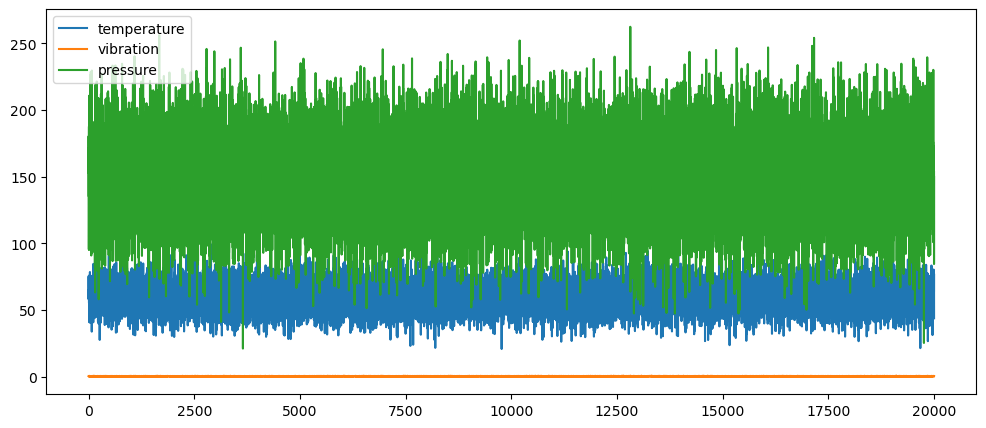

In [4]:
df[['temperature','vibration','pressure']].plot(figsize=(12,5))


array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'vibration'}>],
       [<Axes: title={'center': 'pressure'}>, <Axes: >]], dtype=object)

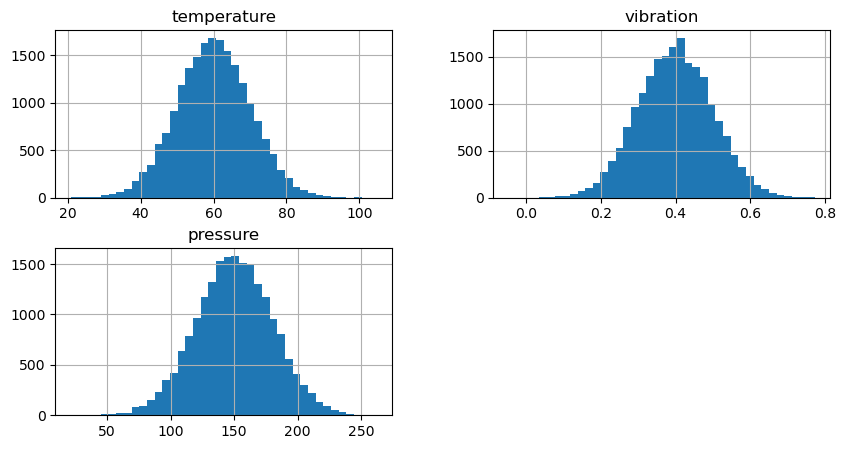

In [5]:
df[['temperature','vibration','pressure']].hist(bins=40, figsize=(10,5))


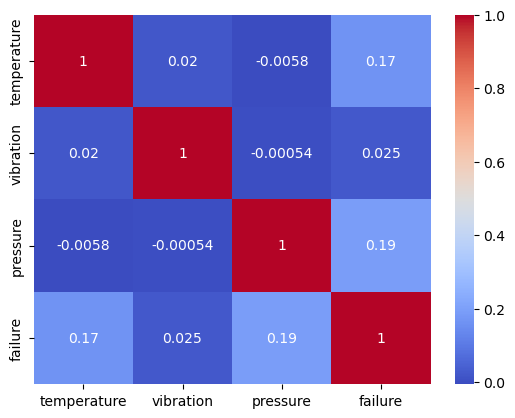

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['temperature','vibration','pressure','failure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [7]:
df.to_csv("factory_sensor_data.csv", index=False)
